# Projeto - Análise de ações do mercado financeiro

### Importação das Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf

### Aquisição dos dados das ações

#### Existe vários sites para coletar dados da bolsa de valores: <br>
* yfinance > https://algotrading101.com/learn/yfinance-guide/
* investpy > https://investpy.readthedocs.io/
* pybovespa > https://pypi.org/project/pybovespa/
* quandl > https://data.nasdaq.com/
* pandasfinance > https://pypi.org/project/pandas-finance/
* pandasreader > https://pandas-datareader.readthedocs.io/en/latest/

In [2]:
# Criação da variavell ticket e importando as informações das ações da Bovespa
var_ticket = yf.Ticker("^BVSP")

# criação de um dataframe com os historicos das ações do ticket da Bovespa dos meses (interval = "1mo") dos últimos 3 anos (period="3y")
df_bovespa = var_ticket.history(period="3y", interval="1mo")

In [3]:
df_bovespa.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-01 00:00:00-03:00,87395.0,97693.0,86837.0,95056.0,232321100,0.0,0.0
2020-07-01 00:00:00-03:00,95062.0,105704.0,95062.0,102912.0,212054200,0.0,0.0
2020-08-01 00:00:00-03:00,102913.0,104523.0,98513.0,99369.0,202682200,0.0,0.0
2020-09-01 00:00:00-03:00,99382.0,103226.0,93408.0,94603.0,182459100,0.0,0.0
2020-10-01 00:00:00-03:00,94604.0,102218.0,93387.0,93952.0,198128300,0.0,0.0


In [4]:
# Criação de um Dataframe com os historicos das ações do ticket da Bovespa, sendo iniciado (start) na data 01/01/2018 e finalizado (end) na data 01/01/2021 por dia (interval)
df_bovespa = var_ticket.history(interval="1d", start="2018-01-01", end="2021-01-01")

In [5]:
# Verificar se foi importado as informações das datas de início (01/01/2018)
df_bovespa.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-02:00,76403.0,77909.0,76403.0,77891.0,2880300,0.0,0.0
2018-01-03 00:00:00-02:00,77889.0,78414.0,77602.0,77995.0,3142200,0.0,0.0
2018-01-04 00:00:00-02:00,77998.0,79135.0,77998.0,78647.0,3486100,0.0,0.0
2018-01-05 00:00:00-02:00,78644.0,79071.0,78218.0,79071.0,2747100,0.0,0.0
2018-01-08 00:00:00-02:00,79070.0,79395.0,78631.0,79379.0,2550800,0.0,0.0


In [6]:
# Verificar se foi importado as informações das datas finais (31/12/2020)
df_bovespa.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-22 00:00:00-03:00,115825.0,116903.0,115648.0,116348.0,6947900,0.0,0.0
2020-12-23 00:00:00-03:00,116636.0,118311.0,116636.0,117857.0,6483300,0.0,0.0
2020-12-28 00:00:00-03:00,117806.0,119213.0,117805.0,119051.0,7171700,0.0,0.0
2020-12-29 00:00:00-03:00,119130.0,119861.0,118750.0,119475.0,6769700,0.0,0.0
2020-12-30 00:00:00-03:00,119410.0,120150.0,118919.0,119306.0,8235700,0.0,0.0


In [7]:
# Mostra as informações do Dataframe
df_bovespa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 741 entries, 2018-01-02 00:00:00-02:00 to 2020-12-30 00:00:00-03:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          741 non-null    float64
 1   High          741 non-null    float64
 2   Low           741 non-null    float64
 3   Close         741 non-null    float64
 4   Volume        741 non-null    int64  
 5   Dividends     741 non-null    float64
 6   Stock Splits  741 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 46.3 KB


### Entendo as informações do Dataframe: 
* Date = Data 
* Open = Abertura do mercado
* High = Alta do mercado
* Low = Baixa do mercado
* Close = Fechamento do mercado
* Volume = Volume de transações
* Dividends = Dividendos
* Stock Splits = Desdobramento de ações (É um processo de aumento do número de ações em circulação nos mercados bolsistas, a fim de reduzir o preço bolsista das ações)

### Decomposição de uma série temporal

#### Biblioteca: from statsmodels.tsa.seasonal import seasonal_decompose <br>
> https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose
#### Objetivo: Decomposição sazonal usando médias móveis <br>
#### Sintaxe: statsmodels.tsa.seasonal.seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0) <br>
#### Parâmetros: <br>
* x: Séries temporais. Se 2d, as séries individuais estão em colunas. x deve conter 2 ciclos completos.
* Modelo matemático (model):
    * Modelo aditivo (additive): Y[t] = Trend[t] + Seasonality[t] + Noise[t]
    * Modelo multiplicativo (multiplicative): Y[t] = Trend[t] * Seasonality[t] * Noise[t]
        * Tendência (Trend)
        * Sazonalidade (Seasonality)
        * Ruído (Noise)
* filt: Os coeficientes de filtro para filtrar o componente sazonal. O método de média móvel concreto usado na filtragem é determinado por two_sided.
* period: Período da série. Deve ser usado se x não for um objeto pandas ou se o índice de x não tiver uma frequência. Substitui a periodicidade padrão de x se x for um objeto pandas com um índice de série temporal.
* two_sided: O método de média móvel usado na filtragem. Se True (padrão), uma média móvel centralizada é calculada usando o filtro. Se Falso, os coeficientes do filtro são apenas para valores passados.
* extrapolate_trend: Se definido como > 0, a tendência resultante da convolução é de mínimos quadrados lineares extrapolados em ambas as extremidades (ou o único se two_sided for False) considerando esses muitos (+1) pontos mais próximos. Se definido como 'freq', use os pontos de frequência mais próximos. A definição desse parâmetro resulta em nenhum valor NaN nos componentes de tendência ou residuais.
* Retorna: Um objeto com atributos sazonais, de tendência e residuais.

In [8]:
var_decomposicao = seasonal_decompose(x = df_bovespa[["Close"]], model='additive', period=30, extrapolate_trend=30)

In [9]:
df_bovespa[["Close"]].head(10) # 78578.285714

,Close
Date,
2018-01-02 00:00:00-02:00,77891.0
2018-01-03 00:00:00-02:00,77995.0
2018-01-04 00:00:00-02:00,78647.0
2018-01-05 00:00:00-02:00,79071.0
2018-01-08 00:00:00-02:00,79379.0
2018-01-09 00:00:00-02:00,78864.0
2018-01-10 00:00:00-02:00,78201.0
2018-01-11 00:00:00-02:00,79365.0
2018-01-12 00:00:00-02:00,79349.0


In [10]:
# Y[t] = Trend[t] + Seasonality[t] + Noise[t] > Igual a série do Close
var_decomposicao.trend + var_decomposicao.seasonal + var_decomposicao.resid

Date
2018-01-02 00:00:00-02:00     77891.0
2018-01-03 00:00:00-02:00     77995.0
2018-01-04 00:00:00-02:00     78647.0
2018-01-05 00:00:00-02:00     79071.0
2018-01-08 00:00:00-02:00     79379.0
                               ...   
2020-12-22 00:00:00-03:00    116348.0
2020-12-23 00:00:00-03:00    117857.0
2020-12-28 00:00:00-03:00    119051.0
2020-12-29 00:00:00-03:00    119475.0
2020-12-30 00:00:00-03:00    119306.0
Length: 741, dtype: float64

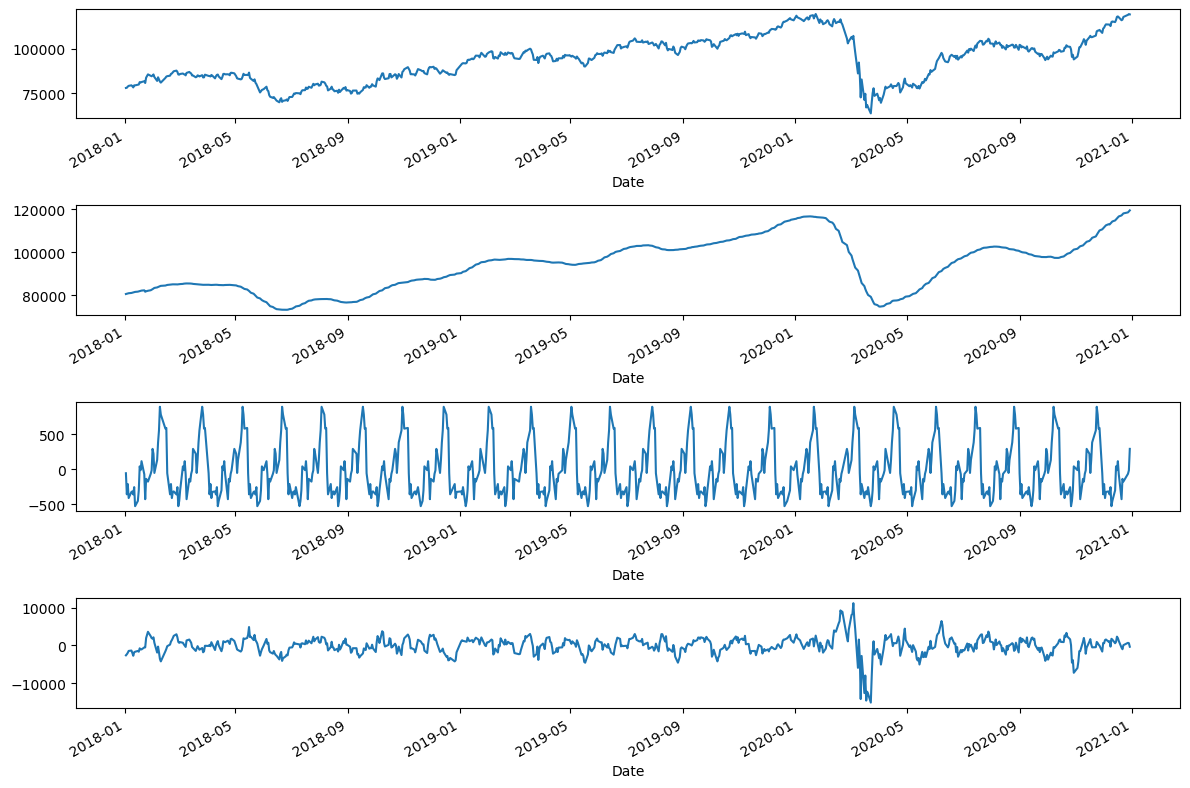

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
var_decomposicao.observed.plot(ax=ax1)
var_decomposicao.trend.plot(ax=ax2)
var_decomposicao.seasonal.plot(ax=ax3)
var_decomposicao.resid.plot(ax=ax4)
plt.tight_layout()

### Média móvel <br>
#### A média móvel é um indicador que faz parte da Análise Técnica de ações. Com ela, é possível identificar o equilíbrio dos preços no mercado, observando tendências de alta, neutra ou baixa. A representação gráfica das médias móveis é normalmente feita por uma linha, que se movimenta conforme os dados novos recebidos para o cálculo. Esse indicador pode oferecer informações valiosas sobre os movimentos das ações na Bolsa de Valores. <br>

#### É um indicador importante que suaviza os dados dos preços das ações para formar um indicador que segue a tendência. <br>

#### Neste indicador, são utilizadas médias de períodos diferentes, geralmente uma de curto prazo e outra de longo prazo. O termo “móvel” é porque os dados são renovados com frequência, isto é, são calculados com base nos valores mais recentes. <br>

#### É importante ressaltar que as médias móveis são recomendadas para verificar a movimentação dos preços de uma ação no mercado por um determinado período, sempre observando quais serão as tendências de preços. <br>

#### Além disso, as médias móveis ajudam a filtrar os ruídos, que são representados pelas oscilações mais fortes. Dessa maneira, é mais fácil entender o comportamento do preço de uma ação. <br>

> https://blog.toroinvestimentos.com.br/trading/media-movel

In [12]:
# Média móvel de 7 dias das ações de fechamento da Bovespa (Soma os valores das ações nos ultimos 7 dias e faz uma média)
df_bovespa["Close"].rolling(7).mean().head(7)
# R$ 77.891,00 
# R$ 77.995,00 
# R$ 78.647,00 
# R$ 79.071,00 
# R$ 79.379,00 
# R$ 78.864,00 
# R$ 78.201,00 
# Média: 550.048,00 / 7 = 78.578,29

Date
2018-01-02 00:00:00-02:00             NaN
2018-01-03 00:00:00-02:00             NaN
2018-01-04 00:00:00-02:00             NaN
2018-01-05 00:00:00-02:00             NaN
2018-01-08 00:00:00-02:00             NaN
2018-01-09 00:00:00-02:00             NaN
2018-01-10 00:00:00-02:00    78578.285714
Name: Close, dtype: float64

In [13]:
# Média móvel de 7 dias das ações de fechamento da Bovespa (Soma os valores das ações nos ultimos 7 dias e faz uma média)
var_media_movel_7d = df_bovespa["Close"].rolling(7).mean()
# Média móvel de 14 dias das ações de fechamento da Bovespa (Soma os valores das ações nos ultimos 14 dias e faz uma média)
var_media_movel_14d = df_bovespa["Close"].rolling(14).mean()
# Média móvel de 21 dias das ações de fechamento da Bovespa (Soma os valores das ações nos ultimos 21 dias e faz uma média)
var_media_movel_21d = df_bovespa["Close"].rolling(21).mean()

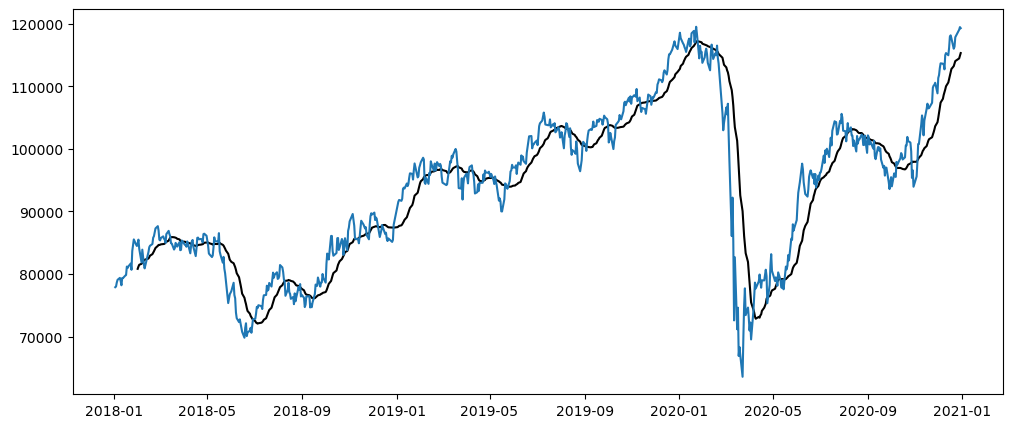

In [14]:
# Comparando a média movel dos ultimos 21 dias com os valores de fechamento
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(var_media_movel_21d, "black")
plt.plot(df_bovespa["Close"]);

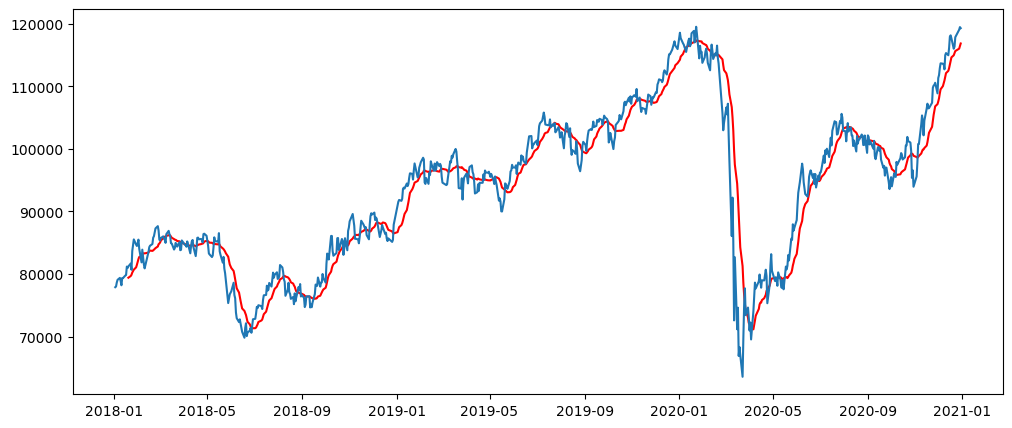

In [15]:
# Comparando a média movel dos ultimos 14 dias com os valores de fechamento
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(var_media_movel_14d, "red")
plt.plot(df_bovespa["Close"]);

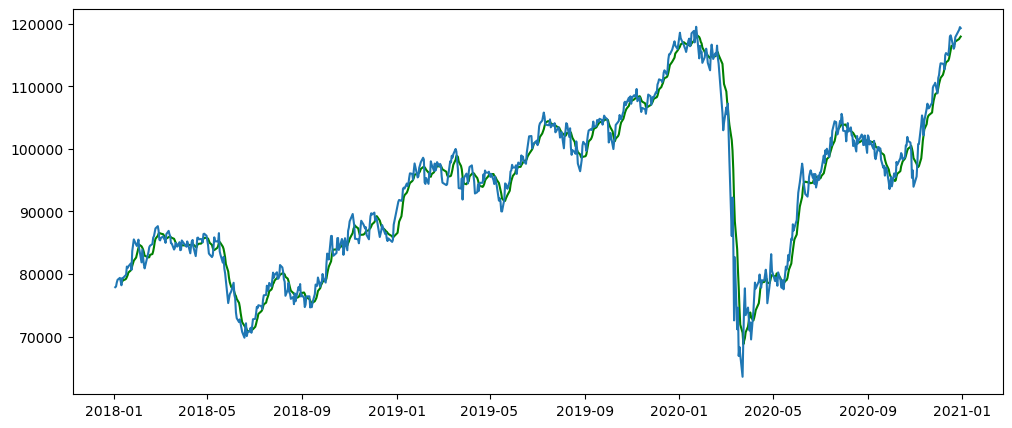

In [16]:
# Comparando a média movel dos ultimos 7 dias com os valores de fechamento
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(var_media_movel_7d, "green")
plt.plot(df_bovespa["Close"]);

### Criação de Features (Características)

In [17]:
# Redefina o índice do Dataframe. A coluna Data estava sendo utilizada como indice
df_bovespa = df_bovespa.reset_index()

In [18]:
# Tranformando a coluna Date em data e mostrando apenas o ano
df_bovespa['Date'].dt.year

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
736    2020
737    2020
738    2020
739    2020
740    2020
Name: Date, Length: 741, dtype: int64

In [19]:
# Criação das colunas ano, mês e dia utilizando a coluna Date
df_bovespa['Year'] = df_bovespa['Date'].dt.year
df_bovespa['Month'] = df_bovespa['Date'].dt.month
df_bovespa['Day'] = df_bovespa['Date'].dt.day

In [20]:
# Criação da coluna Rentabilidade 
# Ações fechadas e divide pela próxima ação fechada (shift). Depois multiplica por 100 e subtrai 100
df_bovespa['Profitability'] = df_bovespa['Close'] / df_bovespa['Close'].shift() * 100 - 100

In [21]:
df_bovespa.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,Profitability
0,2018-01-02 00:00:00-02:00,76403.0,77909.0,76403.0,77891.0,2880300,0.0,0.0,2018,1,2,NaN
1,2018-01-03 00:00:00-02:00,77889.0,78414.0,77602.0,77995.0,3142200,0.0,0.0,2018,1,3,0.133520
2,2018-01-04 00:00:00-02:00,77998.0,79135.0,77998.0,78647.0,3486100,0.0,0.0,2018,1,4,0.835951
3,2018-01-05 00:00:00-02:00,78644.0,79071.0,78218.0,79071.0,2747100,0.0,0.0,2018,1,5,0.539118
4,2018-01-08 00:00:00-02:00,79070.0,79395.0,78631.0,79379.0,2550800,0.0,0.0,2018,1,8,0.389523


In [22]:
# Criação de uma função que receberá um Dataframe e incluirá as colunas de dia, mês, ano e rentabilidade
def features_extraction(df_):
    df_['Year'] = df_['Date'].dt.year
    df_['Month'] = df_['Date'].dt.month
    df_['Day'] = df_['Date'].dt.day
    df_['Profitability'] = df_['Close'] / df_['Close'].shift() * 100 - 100

In [23]:
# Aplicando a função criada no Dataframe do Bovespa
features_extraction(df_bovespa)

### Hipotese 1) Existe um melhor mês para investir no ativo?
#### Considerando 3 anos de dados de rentabilidade, o agrupamento deve mostrar que os meses de janeiro, junho e setembro são mais interesessantes para investir. 

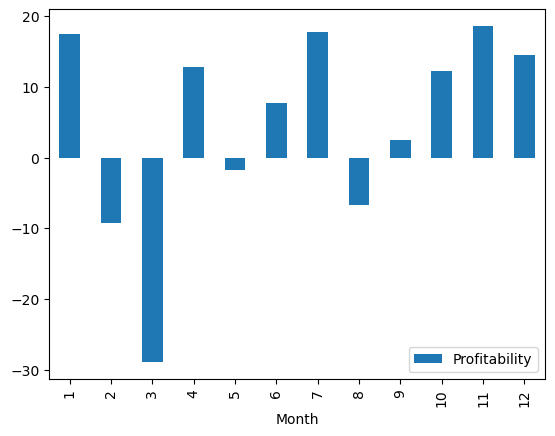

In [24]:
# Total da rentabilidade por mês (Agrupamento mensal da coluna de rentabilidade)
# Os somatórios do agrupamernto mensal da rentabilidade é exibido num gráfico de barra 
df_bovespa.groupby('Month').agg({'Profitability':'sum'}).plot(kind='bar');

In [25]:
# Defina o índice do DataFrame usando a coluna Date
df_bovespa.set_index('Date', inplace=True)

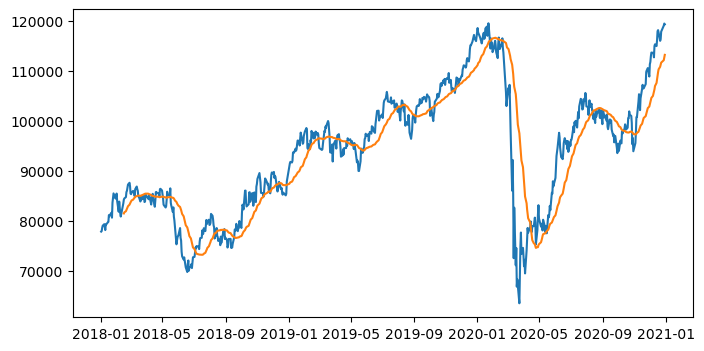

In [26]:
# Comparando a média movel dos ultimos 30 dias com os valores de fechamento
var_media_movel_30d = df_bovespa["Close"].rolling(30).mean()
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df_bovespa["Close"])
plt.plot(var_media_movel_30d);

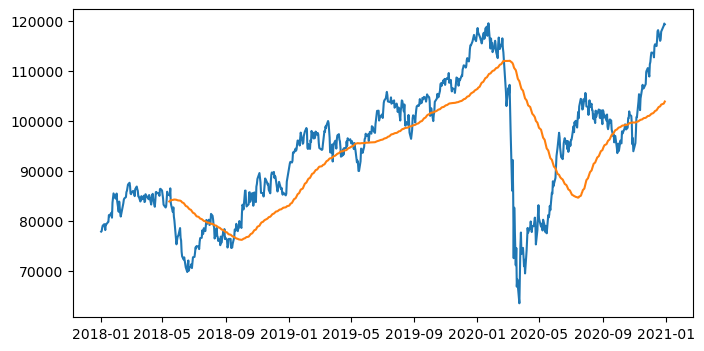

In [27]:
# Comparando a média movel dos ultimos 90 dias com os valores de fechamento
var_media_movel_90d = df_bovespa["Close"].rolling(90).mean()
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df_bovespa["Close"])
plt.plot(var_media_movel_90d);

### Hipotese 2) Existe um melhor dia para investir no ativo?

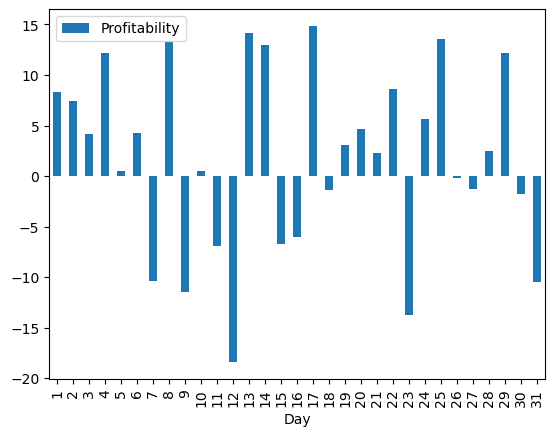

In [28]:
# Total da rentabilidade por dia (Agrupamento diário da coluna de rentabilidade)
# Os somatorios do agrupamernto diário da rentabilidade é exibido num gráfico de barra 
df_bovespa.groupby('Day').agg({'Profitability':'sum'}).plot(kind='bar');

In [29]:
# Mostrando os valores da primeira linha do Dataframe
df_bovespa.iloc[0]

Open               76403.0
High               77909.0
Low                76403.0
Close              77891.0
Volume           2880300.0
Dividends              0.0
Stock Splits           0.0
Year                2018.0
Month                  1.0
Day                    2.0
Profitability          NaN
Name: 2018-01-02 00:00:00-02:00, dtype: float64

In [30]:
# Mostrando os valores da ultima linha do Dataframe
df_bovespa.iloc[-1]

Open             1.194100e+05
High             1.201500e+05
Low              1.189190e+05
Close            1.193060e+05
Volume           8.235700e+06
Dividends        0.000000e+00
Stock Splits     0.000000e+00
Year             2.020000e+03
Month            1.200000e+01
Day              3.000000e+01
Profitability   -1.414522e-01
Name: 2020-12-30 00:00:00-03:00, dtype: float64

In [31]:
# Calculando a rentabilidade do primeiro valor com o ultimo
df_bovespa["Close"].iloc[-1] / df_bovespa["Close"].iloc[0] * 100 - 100

53.17045615026126

### Correlação de séries temporais

In [32]:
# Lista das ações da Vale, Itau, Petrobras, Ambev, Banco do Brasil, Branco Bradesco, Bovespa e Dolar
lista_tickets = ['VALE3.SA', 'ITUB4.SA', 'PETR4.SA', 'ABEV3.SA', 'BBDC4.SA', 'BBAS3.SA', '^BVSP', 'USDBRL=X']

In [33]:
# Criação de lista de Dataframe vazia
lista_dfs = []

for var_ativo in lista_tickets:
    print(f'Lendo o ticket {var_ativo}')
    var_ticket = yf.Ticker(var_ativo)
    df_auxiliar = var_ticket.history(interval="1d", start="2018-01-01", end="2021-01-01")
    df_auxiliar.reset_index(inplace=True)
    df_auxiliar['Ticket'] = var_ativo
    lista_dfs.append(df_auxiliar)

Lendo o ticket VALE3.SA
Lendo o ticket ITUB4.SA
Lendo o ticket PETR4.SA
Lendo o ticket ABEV3.SA
Lendo o ticket BBDC4.SA
Lendo o ticket BBAS3.SA
Lendo o ticket ^BVSP
Lendo o ticket USDBRL=X


In [34]:
# Exibindo as informações do ativo de indice 1 da lista de Dataframes
# Mostrando as informações do ativo Itau, por exemplo 
lista_dfs[1]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticket
0,2018-01-02 00:00:00-02:00,22.768827,23.343367,22.768827,23.343367,16650900,0.01,0.0,ITUB4.SA
1,2018-01-03 00:00:00-02:00,23.354007,23.588079,23.178452,23.502962,22295700,0.00,0.0,ITUB4.SA
2,2018-01-04 00:00:00-02:00,23.540204,24.098786,23.540204,23.992388,23222550,0.00,0.0,ITUB4.SA
3,2018-01-05 00:00:00-02:00,24.003017,24.109413,23.726386,24.061535,15717450,0.00,0.0,ITUB4.SA
4,2018-01-08 00:00:00-02:00,23.971098,24.109413,23.822142,23.981737,12708150,0.00,0.0,ITUB4.SA
...,...,...,...,...,...,...,...,...,...
737,2020-12-22 00:00:00-03:00,28.475481,28.913986,28.457209,28.548565,19659000,0.00,0.0,ITUB4.SA
738,2020-12-23 00:00:00-03:00,28.612509,29.279403,28.566832,29.178913,19959200,0.00,0.0,ITUB4.SA
739,2020-12-28 00:00:00-03:00,29.434709,29.626555,29.242860,29.389029,15444600,0.00,0.0,ITUB4.SA
740,2020-12-29 00:00:00-03:00,29.480383,29.590009,29.169775,29.325077,16384200,0.00,0.0,ITUB4.SA


In [35]:
# Aplicando a função features_extraction em cada dataframe da lista de ativos
for df_ativo in lista_dfs:
    features_extraction(df_ativo)

In [36]:
# Mostrando as informações do ativo Itau, por exemplo 
lista_dfs[1]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticket,Year,Month,Day,Profitability
0,2018-01-02 00:00:00-02:00,22.768827,23.343367,22.768827,23.343367,16650900,0.01,0.0,ITUB4.SA,2018,1,2,NaN
1,2018-01-03 00:00:00-02:00,23.354007,23.588079,23.178452,23.502962,22295700,0.00,0.0,ITUB4.SA,2018,1,3,0.683687
2,2018-01-04 00:00:00-02:00,23.540204,24.098786,23.540204,23.992388,23222550,0.00,0.0,ITUB4.SA,2018,1,4,2.082400
3,2018-01-05 00:00:00-02:00,24.003017,24.109413,23.726386,24.061535,15717450,0.00,0.0,ITUB4.SA,2018,1,5,0.288204
4,2018-01-08 00:00:00-02:00,23.971098,24.109413,23.822142,23.981737,12708150,0.00,0.0,ITUB4.SA,2018,1,8,-0.331640
...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,2020-12-22 00:00:00-03:00,28.475481,28.913986,28.457209,28.548565,19659000,0.00,0.0,ITUB4.SA,2020,12,22,0.482323
738,2020-12-23 00:00:00-03:00,28.612509,29.279403,28.566832,29.178913,19959200,0.00,0.0,ITUB4.SA,2020,12,23,2.207986
739,2020-12-28 00:00:00-03:00,29.434709,29.626555,29.242860,29.389029,15444600,0.00,0.0,ITUB4.SA,2020,12,28,0.720093
740,2020-12-29 00:00:00-03:00,29.480383,29.590009,29.169775,29.325077,16384200,0.00,0.0,ITUB4.SA,2020,12,29,-0.217603


In [37]:
# Criação de um Dataframe para receber as informações dos Dataframes de cada ativo
df_correlacao = pd.DataFrame()

# Para cada Dataframe de ativos na lista de ativos inclua no df_correlacao os valores da coluna Profitability, utilizando com base a coluna Ticket
for df_ativo in lista_dfs:
    df_correlacao[df_ativo['Ticket'].iloc[0]] = df_ativo['Profitability']

In [38]:
df_correlacao.head()

,VALE3.SA,ITUB4.SA,PETR4.SA,ABEV3.SA,BBDC4.SA,BBAS3.SA,^BVSP,USDBRL=X
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.599237,0.683687,0.906356,0.230511,0.459687,1.275453,0.133520,0.102796
2,0.409922,2.082400,0.179621,-0.551966,1.640762,0.959507,0.835951,-1.606765
3,1.561022,0.288204,0.597743,0.370009,0.566453,0.000000,0.539118,-0.684511
4,2.222729,-0.331640,1.188347,-0.184317,-0.028106,0.237556,0.389523,-0.074182


In [39]:
# Exibindo a correlação da rentabilidade de cada ativo
df_correlacao.corr()

,VALE3.SA,ITUB4.SA,PETR4.SA,ABEV3.SA,BBDC4.SA,BBAS3.SA,^BVSP,USDBRL=X
VALE3.SA,1.000000,0.402224,0.518188,0.284906,0.448637,0.444220,-0.164628,0.043291
ITUB4.SA,0.402224,1.000000,0.610521,0.518501,0.906409,0.814685,-0.087715,-0.063396
PETR4.SA,0.518188,0.610521,1.000000,0.427521,0.658390,0.688906,-0.154042,-0.014080
ABEV3.SA,0.284906,0.518501,0.427521,1.000000,0.535033,0.465094,-0.201329,-0.045189
BBDC4.SA,0.448637,0.906409,0.658390,0.535033,1.000000,0.862564,-0.110402,-0.068715
BBAS3.SA,0.444220,0.814685,0.688906,0.465094,0.862564,1.000000,-0.119901,-0.046259
^BVSP,-0.164628,-0.087715,-0.154042,-0.201329,-0.110402,-0.119901,1.000000,-0.027109
USDBRL=X,0.043291,-0.063396,-0.014080,-0.045189,-0.068715,-0.046259,-0.027109,1.000000


### Visualização da correlação dos ativos usando Searborn

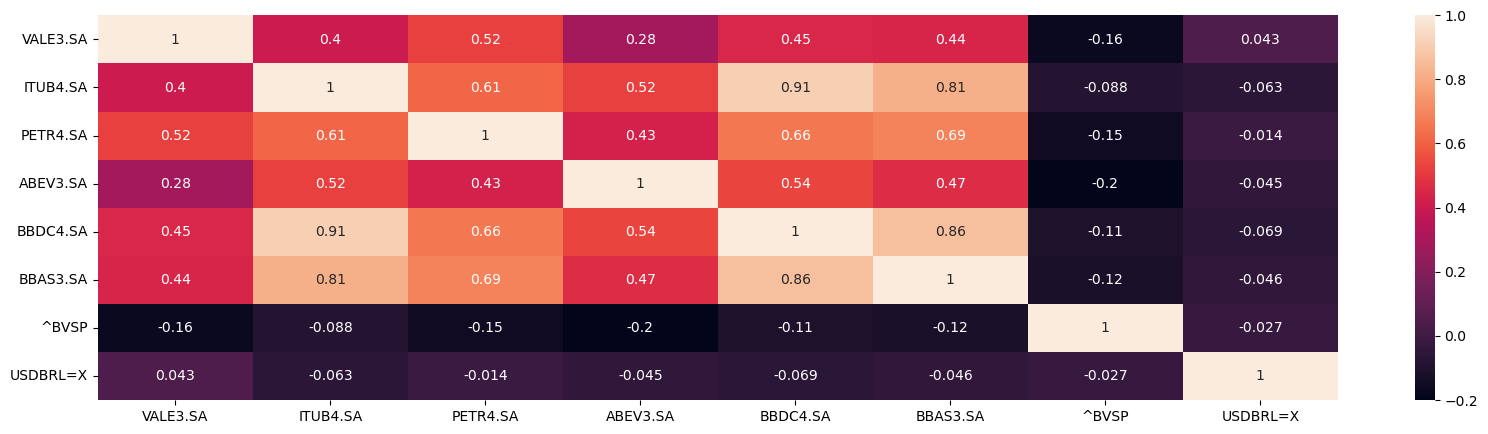

In [40]:
import seaborn as sns
ax, fig = plt.subplots(figsize=(20,5))
ax = sns.heatmap(df_correlacao.corr(), annot=True)